On voudra visualiser les informations apportées par le jeu de données
sur les diamants qui est mis à disposition comme jeu d'exemples par la
bibliothèque Seaborn. On peut le charger comme suit :



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

**Remarque :** Si le chargement échoue lors d'une exécution en local à
cause de restrictions de sécurité réseau qui exigent l'utilisation
d'un proxy, on peut télécharger [le fichier](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv) à l'aide du navigateur et
utiliser ensuite directement ce fichier à la place.



## Informations générales



Commencer par afficher les noms des colonnes, puis les types des
colonnes et la taille en mémoire de la `DataFrame`.



In [2]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
diamonds.memory_usage(deep=True)

Index          128
carat       431520
cut        3413674
color      3128520
clarity    3242590
depth       431520
table       431520
price       431520
x           431520
y           431520
z           431520
dtype: int64

## Valeurs manquantes ou aberrantes



### Localisation



Chercher s'il y a des valeurs manquantes ou aberrantes (par exemple des dimensions à 0).



In [6]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
(diamonds==0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

### Corrections



Est-ce qu'il est préférable de remplacer les valeurs aberrantes ou de
supprimer les lignes ou colonnes contenant des valeurs aberrantes ?

Supprimer les lignes avec valeurs aberrantes.



In [8]:
diamonds=diamonds[(diamonds != 0).all(axis=1)]

Vérifier qu'il n'y a plus de valeurs aberrantes :



In [9]:
(diamonds==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Tailles des diamants en carats



Afficher les moyenne, déviations standard, et quartiles de la taille
en carats des diamants :



In [10]:
diamonds['carat'].describe()

count    53920.000000
mean         0.797698
std          0.473795
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Afficher l'histogramme de la taille des diamants en carats :



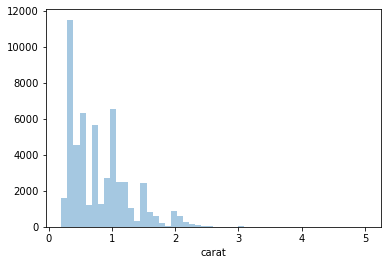

In [12]:
sns.distplot(diamonds['carat'], kde=False);

Utiliser 100 subdivisions (*bins*) de la taille en carats pour
afficher l'histogramme.



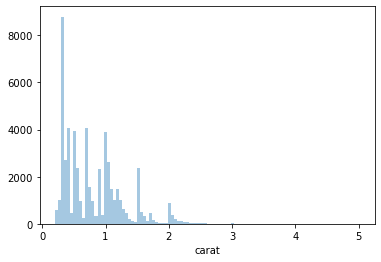

In [13]:
sns.distplot(diamonds['carat'], bins=100, kde=False);

Afficher la distribution de la *table* des diamants :



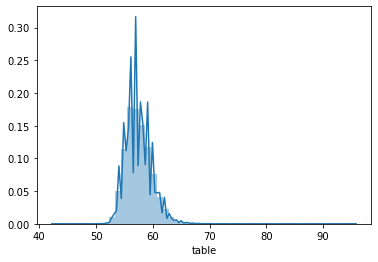

In [15]:
sns.distplot(diamonds["table"]);

Afficher la distribution du prix des diamants :



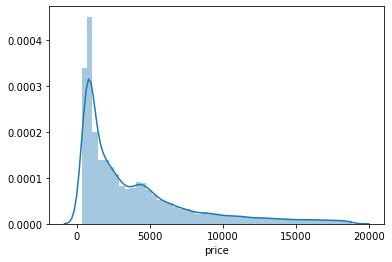

In [17]:
sns.distplot(diamonds["price"]);

Afficher les distributions des dimension `x`, `y` et `z`.

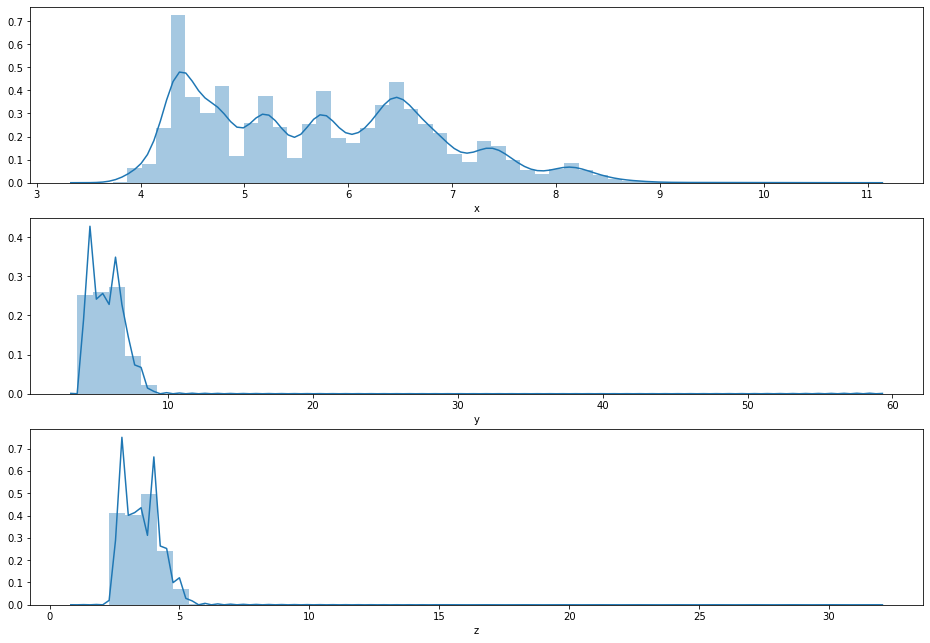

In [20]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(16,11)
sns.distplot(diamonds["x"], ax=axs[0])
sns.distplot(diamonds["y"], ax=axs[1])
sns.distplot(diamonds["z"], ax=axs[2]);

Représenter graphiquement les nombre de diamants dans chaque catégorie
de qualité de taille (`cut`): 'Ideal','Premium','Very Good', 'Good',
'Fair' :

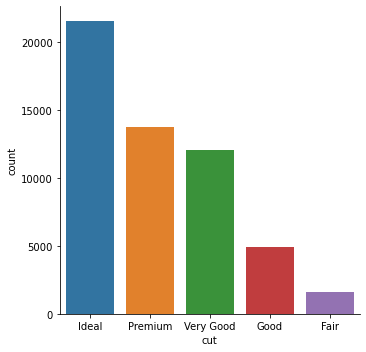

In [21]:
sns.catplot(x="cut", kind="count", data=diamonds, order=['Ideal','Premium','Very Good', 'Good', 'Fair']);

Représenter graphiquement le nombre de diamants dans chaque catégorie
de couleur :



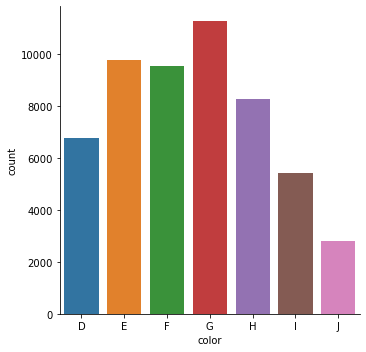

In [22]:
sns.catplot(x="color", kind="count", data=diamonds, order=sorted(list("DEFGHIJ")));

Représenter graphiquement le nombre de diamants dans chaque catégorie
de clareté (*clarity*): 'F','IF', 'WS1','WS2','VS1','VS2', 'SI1','SI2',
'I1', 'I2', 'I3'



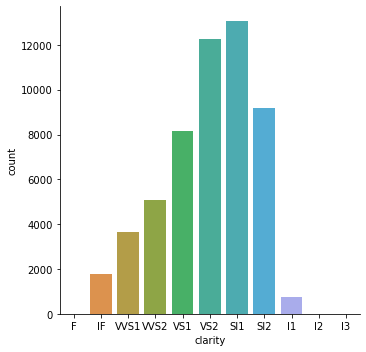

In [24]:
sns.catplot(x="clarity", kind="count", data=diamonds, order=['F','IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2','I1', 'I2', 'I3']);

Pour chacune des catégorie de clareté, représenter graphiquement le
rapport entre la taille en carats et le prix :



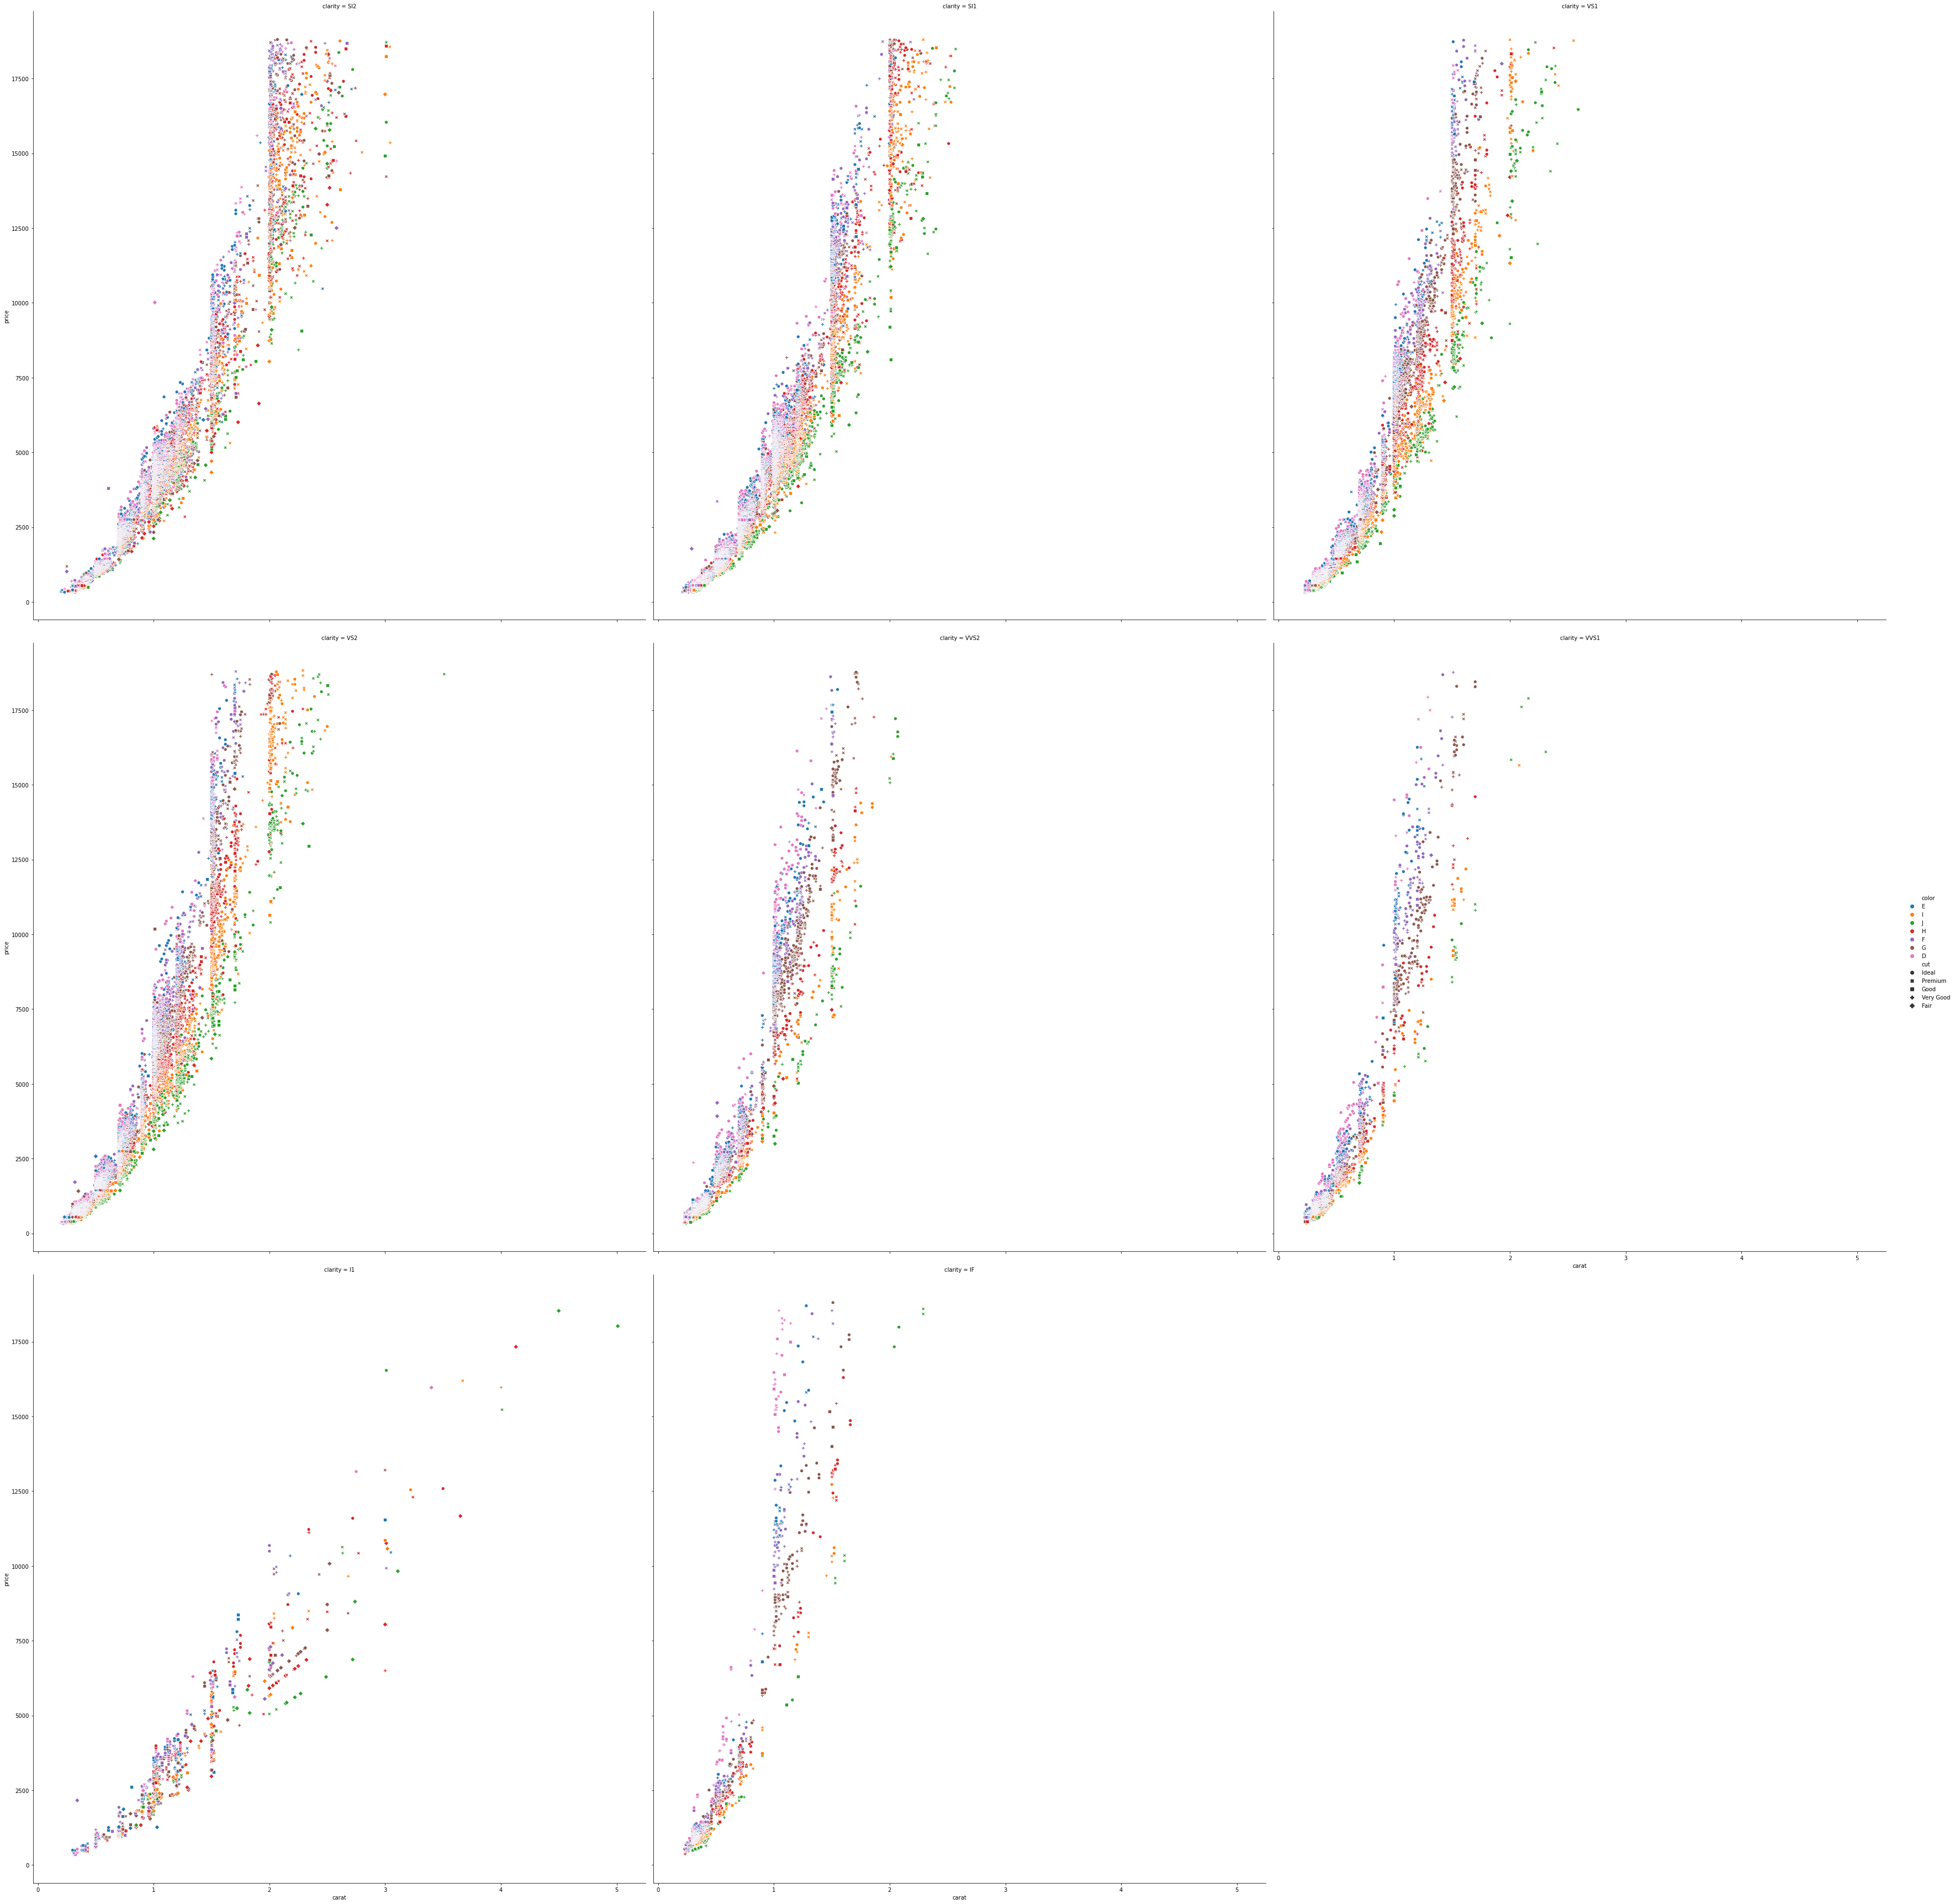

In [25]:
sns.relplot(x='carat', y='price', data=diamonds, hue='color',style='cut',height=16, col='clarity',col_wrap=3);

Représenter graphiquement la relation entre le prix et la dimension
`x` :



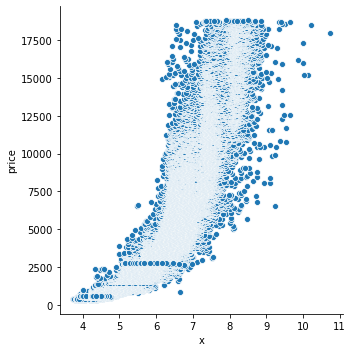

In [26]:
sns.relplot(y="price", x='x', data=diamonds);

Représenter graphiquement la relation entre la taille en carats et la
dimension `x` :



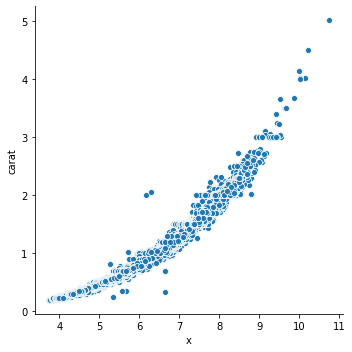

In [27]:
sns.relplot(y="carat", x='x', data=diamonds);

In [34]:
import  numpy as np

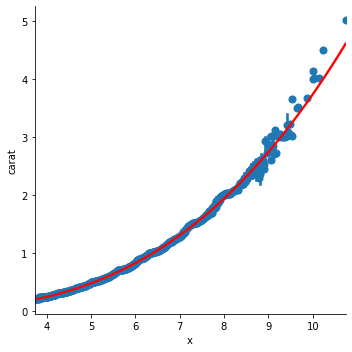

In [35]:
sns.lmplot(y="carat", x='x', data=diamonds, order=3, line_kws={'color': 'red'},  x_estimator=np.mean)

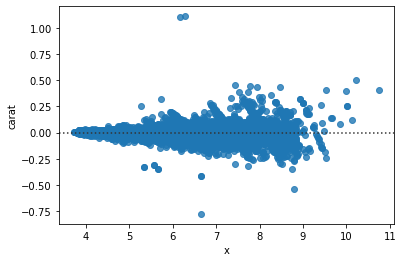

In [45]:
sns.residplot(y="carat", x='x', data=diamonds, order=3);

Représenter graphiquement les distributions de prix pour chaque
catégorie de taille :



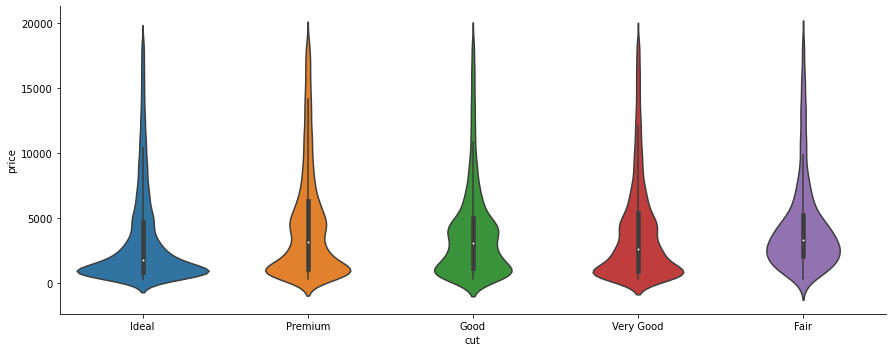

In [48]:
sns.catplot(x="cut", y="price",kind="violin", data=diamonds, aspect=2.5);

Représenter graphiquement les relations entre toutes les paires
d'attributs :



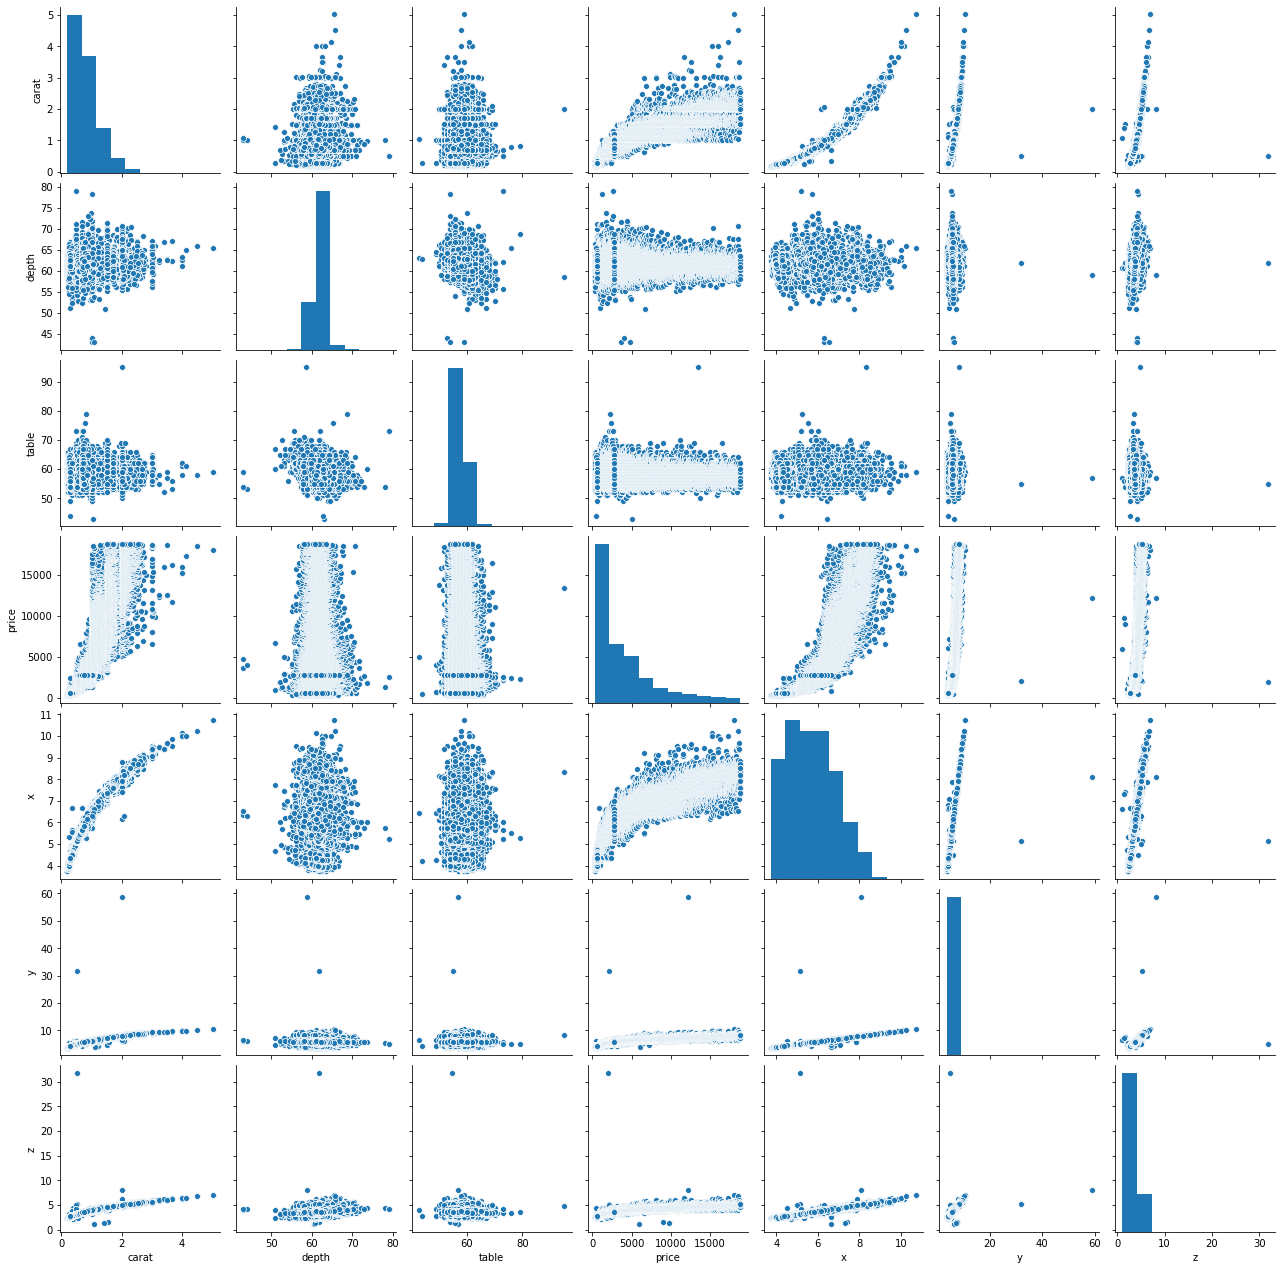

In [49]:
sns.pairplot(diamonds)

Représenter graphiquement les corrélations entre toutes les paires
d'attributs :



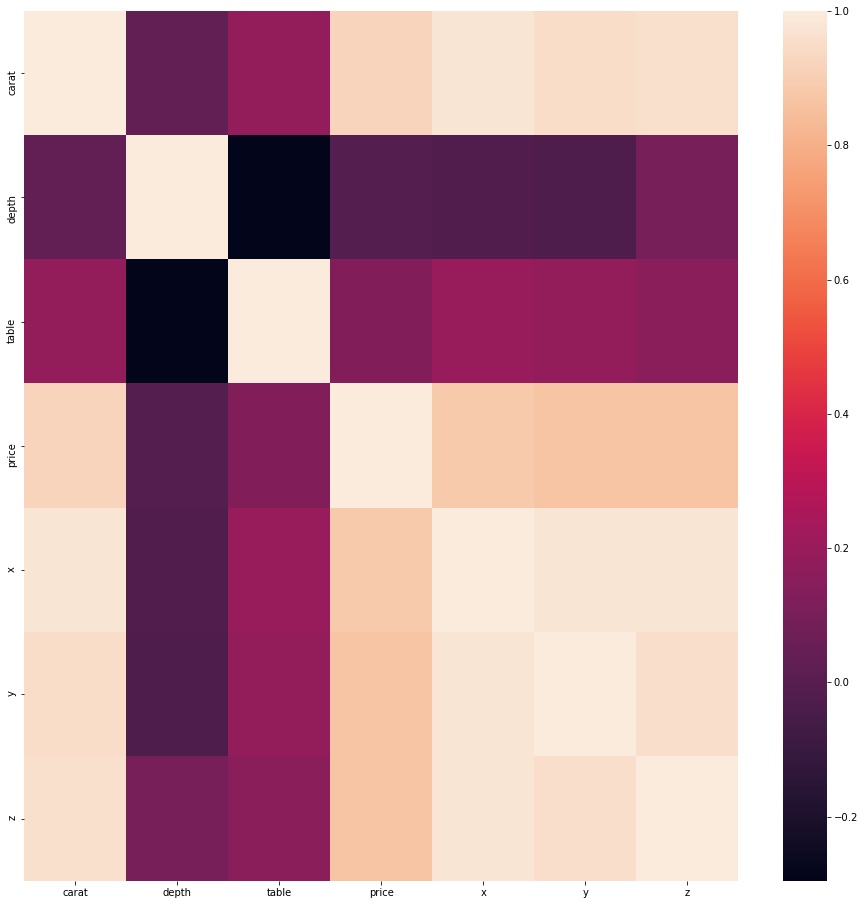

In [50]:
plt.figure(figsize = (16,16))
sns.heatmap(diamonds.corr());